<h1>Step 1: EDA and Visualizations </h1>

Load and Inspect Dataset:
Check feature information, feature count, and the percentage of missing values.
Visualize data distributions and correlations among features.

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv(r'C:\Users\Amjad\Documents\ML\dataset_Project.csv')

In [5]:
# Basic feature info
print(df.info())  # Get data types and non-null counts
print("Shape of dataset:", df.shape)  # Check dimensions of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135973 entries, 0 to 135972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     135973 non-null  int64  
 1   protocol_type                135973 non-null  object 
 2   service                      135973 non-null  int64  
 3   flag                         135973 non-null  int64  
 4   src_bytes                    135973 non-null  int64  
 5   dst_bytes                    135973 non-null  int64  
 6   land                         135973 non-null  int64  
 7   wrong_fragment               135973 non-null  int64  
 8   urgent                       135973 non-null  int64  
 9   hot                          135973 non-null  int64  
 10  num_failed_logins            135973 non-null  int64  
 11  logged_in                    135973 non-null  int64  
 12  num_compromised              135973 non-null  int64  
 13 

In [6]:
# Feature count
print("Total features:", len(df.columns))

Total features: 43


In [7]:
# Percentage of missing values for each feature
missing_values = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:\n", missing_values)

Percentage of missing values:
 duration                        0.000000
protocol_type                   0.000000
service                         0.000000
flag                            0.000000
src_bytes                       0.000000
dst_bytes                       0.000000
land                            0.000000
wrong_fragment                  0.000000
urgent                          0.000000
hot                             0.000000
num_failed_logins               0.000000
logged_in                       0.000000
num_compromised                 0.000000
root_shell                      0.000000
su_attempted                    0.000000
num_root                        0.000000
num_file_creations              0.000000
num_shells                      0.000000
num_access_files                0.000000
num_outbound_cmds               0.000000
is_host_login                   0.000000
is_guest_login                  0.000000
count                           0.000000
srv_count                 

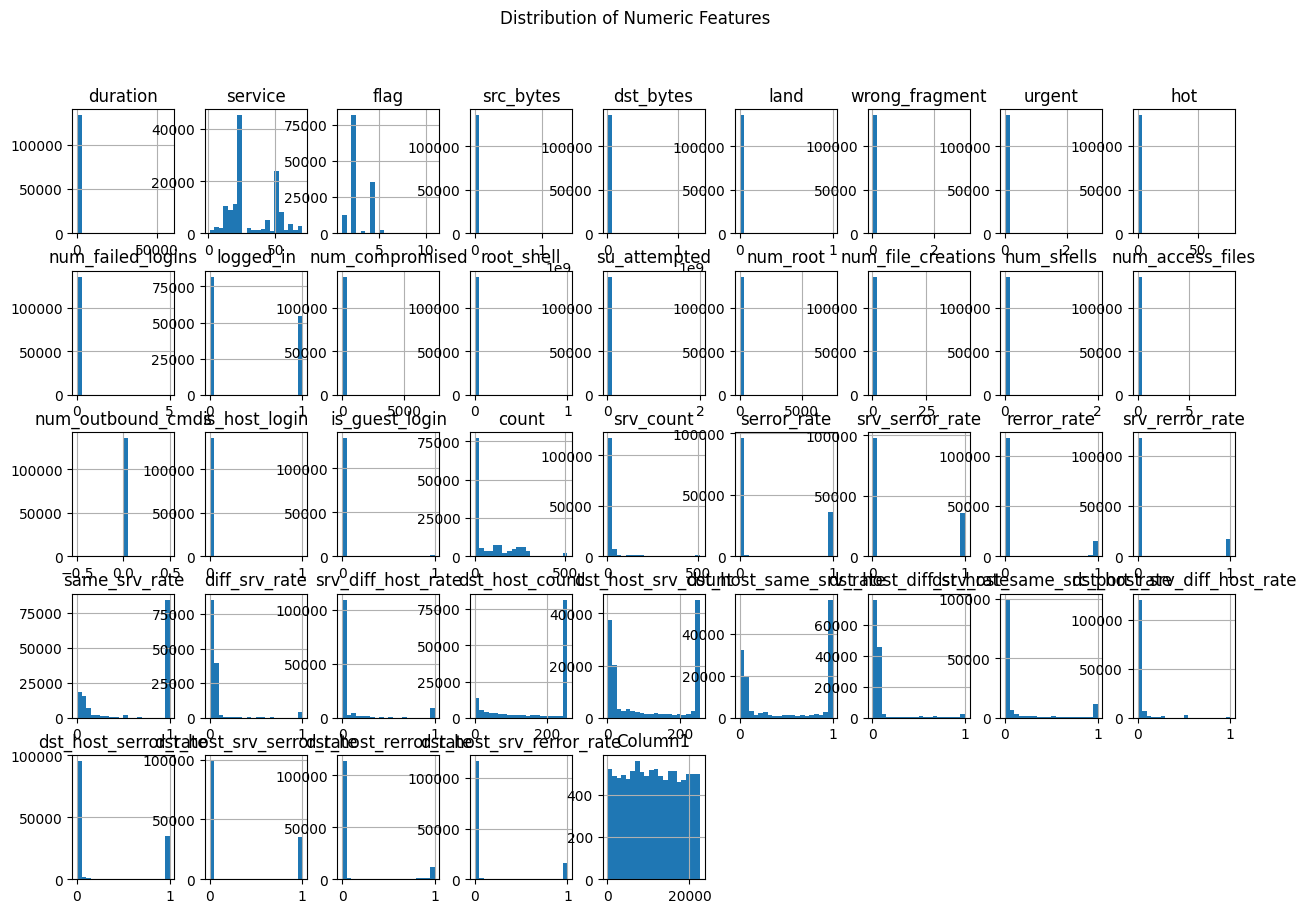

In [8]:
# Visualize distributions for numerical features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns].hist(bins=20, figsize=(15, 10), layout=(5, 9))
plt.suptitle("Distribution of Numeric Features")
plt.show()

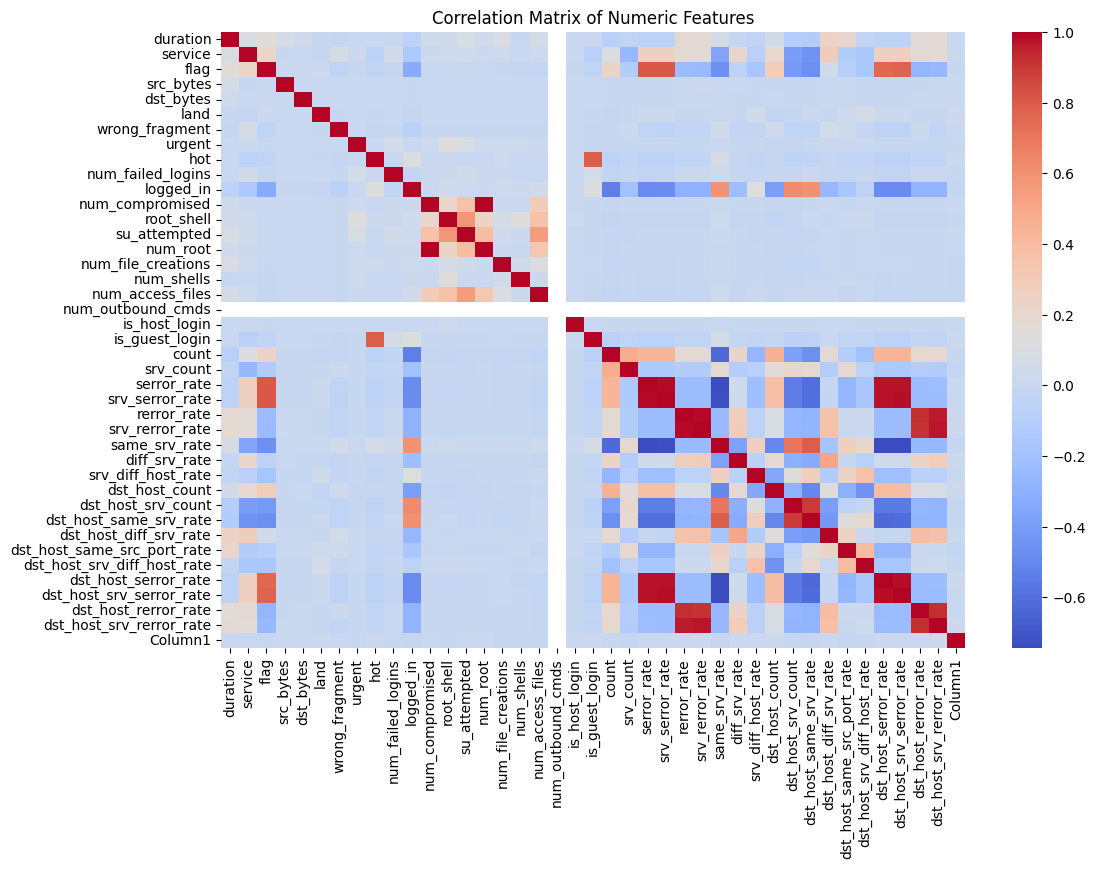

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

<h1>Step 2: Preprocessing </h1>
Handle missing values, duplicates, and categorize features into numeric and categorical.
Apply sampling methods and remove specific classes if needed.

In [10]:
# Handling missing values
# Remove columns with high missing values if necessary (for example, more than 50%)
data = df.dropna(thresh=int(len(df) * 0.5), axis=1)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135968,0,icmp,25,2,315,2537,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
135969,0,icmp,25,2,238,6882,0,0,0,0,...,253,1.00,0.00,0.14,0.05,0.00,0.00,0.00,0.00,normal
135970,0,udp,50,2,54,55,0,0,0,0,...,254,1.00,0.01,0.81,0.00,0.00,0.00,0.00,0.00,normal
135971,0,icmp,25,2,228,5210,0,0,0,0,...,255,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


In [40]:
# Fill remaining missing values (numerical with median, categorical with mode)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
# Remove duplicates
data= df.drop_duplicates()

In [36]:
 # Separate features by type
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index([], dtype='object')

In [14]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_features 

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Column1'],
      dtype='object')

# step 3 the Encode categorical columns , Target variable encoding

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode categorical columns
le = LabelEncoder()
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['xAttack'] = le.fit_transform(df['xAttack'])  # Target variable encoding


# Separate features and target
X = df.drop(columns=['xAttack'])
y = df['xAttack']



# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[-1.11457861e-01, -4.51040238e-01, -7.50236192e-01, ...,
        -2.46042696e-01, -3.91694836e-01, -3.59590917e-03],
       [-1.11457861e-01,  2.53604275e+00,  7.70456020e-01, ...,
        -4.04840158e-01, -3.91694836e-01, -3.59590917e-03],
       [-1.11457861e-01, -4.51040238e-01,  1.07459446e+00, ...,
        -4.04840158e-01, -3.91694836e-01, -3.59590917e-03],
       ...,
       [-1.11457861e-01,  2.53604275e+00,  1.07459446e+00, ...,
        -4.04840158e-01, -3.91694836e-01, -1.50089913e+00],
       [-1.11457861e-01, -4.51040238e-01, -4.46097750e-01, ...,
        -4.04840158e-01, -3.91694836e-01,  2.83012836e-01],
       [-3.49793906e-04, -4.51040238e-01, -7.50236192e-01, ...,
         2.19943822e+00, -3.91694836e-01,  2.11241826e+00]])

# Step 4: Apply Oversampling and Undersampling
Sir oversampling --------> data duplication 
our underSampling -------> data loss 


In [17]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separate features and target
target_col = 'xAttack'
X =df.drop(columns=[target_col])
y = df[target_col]

# Check the class distribution before resampling
print("Original class distribution:",Counter(y))

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("After SMOTE:", Counter(y_resampled))

# Alternatively, apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
print("After Random Undersampling:", Counter(y_resampled))


Original class distribution: Counter({1: 71672, 0: 49259, 2: 12709, 3: 2194, 4: 139})
After SMOTE: Counter({1: 71672, 0: 71672, 3: 71672, 2: 71672, 4: 71672})
After Random Undersampling: Counter({0: 139, 1: 139, 2: 139, 3: 139, 4: 139})


In [29]:

# Remove specific classes (e.g., r2l and u2r) if present in the dataset
#f = df[~df['Class'].isin(['r2l', 'u2r'])]

if 'Class' in df.xAttack:
    df = df[~df['Class'].isin(['r2l', 'u2r'])]
else:
    print("Column 'Class' does not exist in the DataFrame.")


Column 'Class' does not exist in the DataFrame.


<h2>Step 5: Correlation Analysis</h2>
Analyze correlation strengths among features.

In [32]:
# Calculate correlations and categorize them
correlation_matrix = df.corr()
strong_corr = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix != 1.0)]
weak_corr = correlation_matrix[(correlation_matrix < 0.3) & (correlation_matrix != 0)]
no_corr = correlation_matrix[(correlation_matrix == 0)]

print("Strong correlations:\n", strong_corr)
print("Weak correlations:\n", weak_corr)
print("No correlations:\n", no_corr)


Strong correlations:
                              duration  protocol_type  service      flag  \
duration                          NaN            NaN      NaN       NaN   
protocol_type                     NaN            NaN      NaN       NaN   
service                           NaN            NaN      NaN       NaN   
flag                              NaN            NaN      NaN       NaN   
src_bytes                         NaN            NaN      NaN       NaN   
dst_bytes                         NaN            NaN      NaN       NaN   
land                              NaN            NaN      NaN       NaN   
wrong_fragment                    NaN            NaN      NaN       NaN   
urgent                            NaN            NaN      NaN       NaN   
hot                               NaN            NaN      NaN       NaN   
num_failed_logins                 NaN            NaN      NaN       NaN   
logged_in                         NaN            NaN      NaN       NaN   
num

<h2>Step 6: Model Training </h2>
Train various machine learning algorithms and evaluate their performance.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate each model
results = { }
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
print("Model Accuracies:", results)



c:\Users\Amjad\anaconda3\envs\amjad\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracies: {'Random Forest': 0.8705035971223022, 'Logistic Regression': 0.6402877697841727, 'K-Nearest Neighbors': 0.7050359712230215, 'SVM': 0.7697841726618705}


<h1> Step 7: Advanced Model Training (e.g., Deep Learning) </h1>
For advanced models like neural networks, use libraries like Keras or PyTorch. this example setup for a simple neural network using Keras:

In [44]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Neural Network Test Accuracy:", test_accuracy)

Epoch 1/10


c:\Users\Amjad\anaconda3\envs\amjad\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.1944 - loss: 5645.7310 - val_accuracy: 0.1875 - val_loss: -445.6892
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1860 - loss: -2088.8577 - val_accuracy: 0.1875 - val_loss: -2615.3027
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1938 - loss: -9990.6748 - val_accuracy: 0.1875 - val_loss: -5069.9795
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2242 - loss: -21611.8984 - val_accuracy: 0.1875 - val_loss: -8056.4839
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2077 - loss: -24123.9434 - val_accuracy: 0.1875 - val_loss: -11537.8936
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2033 - loss: -25083.5352 - val_accuracy: 0.1875 - val_loss: -16190.1143
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1820 - loss: -27225.2949 - val_accuracy: 0.1875 - val_loss: -22028.1992
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.19

<h1>Step 8: Final Visualization of Model Performance</h1>
Plot the accuracy results for each model to compare their performance.

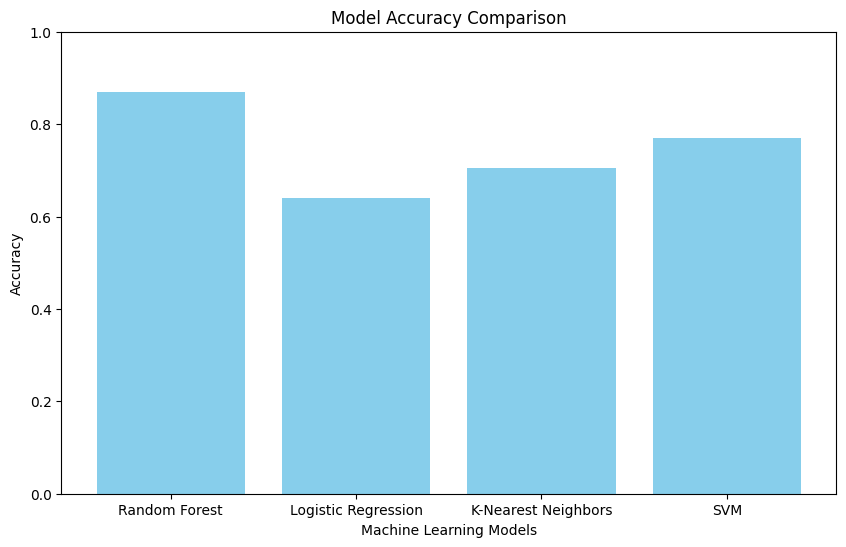

In [48]:
# Plot accuracy results for classical models
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit for better clarity
plt.show()